In [1]:
import CAJAL.lib.visualization as vis
import CAJAL.lib.average_shape_swc as avg_shape
from CAJAL.lib import run_gw, utilities
import pandas as pd
import numpy as np

In [2]:
# Read in GW distance matrix
gw_mat = utilities.load_dist_mat("../CAJAL/data/gw_results/example_geodesic_gw_dist_mat.txt")

In [3]:
# Create 2-dimensional UMAP embedding to visualize the morphology space
umap_emb = vis.get_umap(gw_mat)

/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


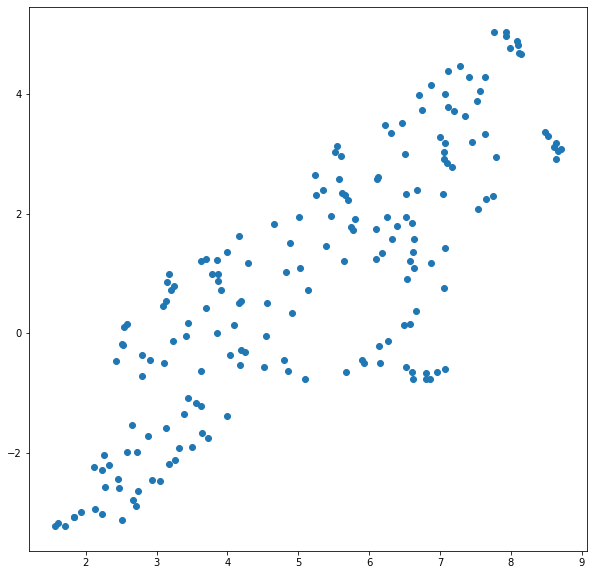

In [4]:
# Scatter plot of UMAP embedding (each point is a cell)
vis.plot_umap(umap_emb)

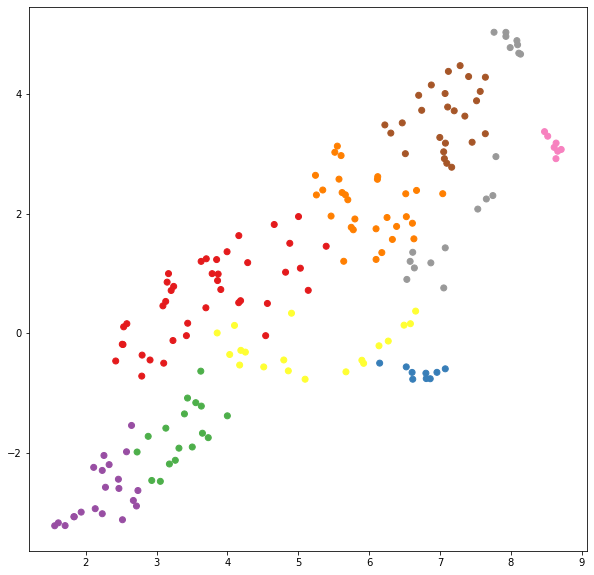

In [5]:
# Louvain clustering of morphology space (cells in the same cluster have more similar morphologies)
louvain_clus = vis.louvain_clustering(gw_mat, nn=5)
vis.plot_umap(umap_emb, c = louvain_clus, cmap="Set1")

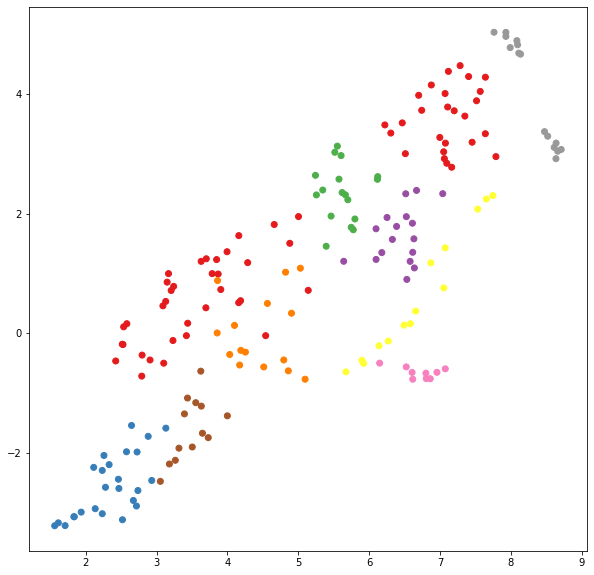

In [6]:
# Leiden clustering of morphology space (cells in the same cluster have more similar morphologies)
leiden_clus = vis.leiden_clustering(gw_mat, nn=5)
vis.plot_umap(umap_emb, c = leiden_clus, cmap="Set1")

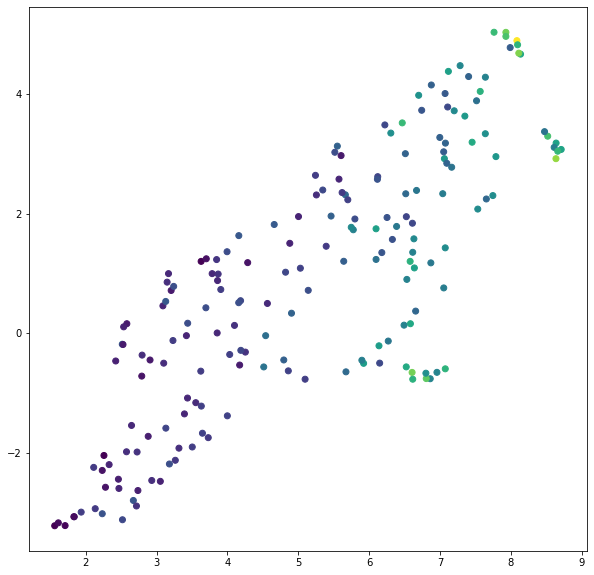

In [7]:
# Plot morphological features to better understand the morphological space
# Features computed separately using ImageJ's SNT, but could be any descriptor
morph_features = pd.read_csv("../CAJAL/data/a10_full_SNT_measurements.csv")
vis.plot_umap(umap_emb, c=morph_features.loc[:,"No. of branches"])

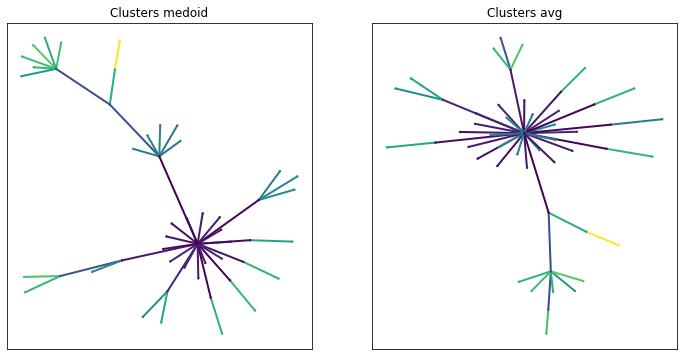

In [10]:
# Get the medoid neuron graph and average neuron graph for a single cluster
data_dir = "../CAJAL/data/sampled_pts/example_geodesic_50"
files_list = utilities.list_sort_files(data_dir, "a10_full")
match_list = np.load("../CAJAL/data/gw_results/a10_full_geodesic_gw_matching.npz")
avg_spt, medoid_spt, confidence = avg_shape.get_avg_shape_spt([0],louvain_clus, data_dir, files_list, match_list, gw_mat, k=3)
avg_shape.plot_avg_medoid(avg_spt, medoid_spt, color=confidence)

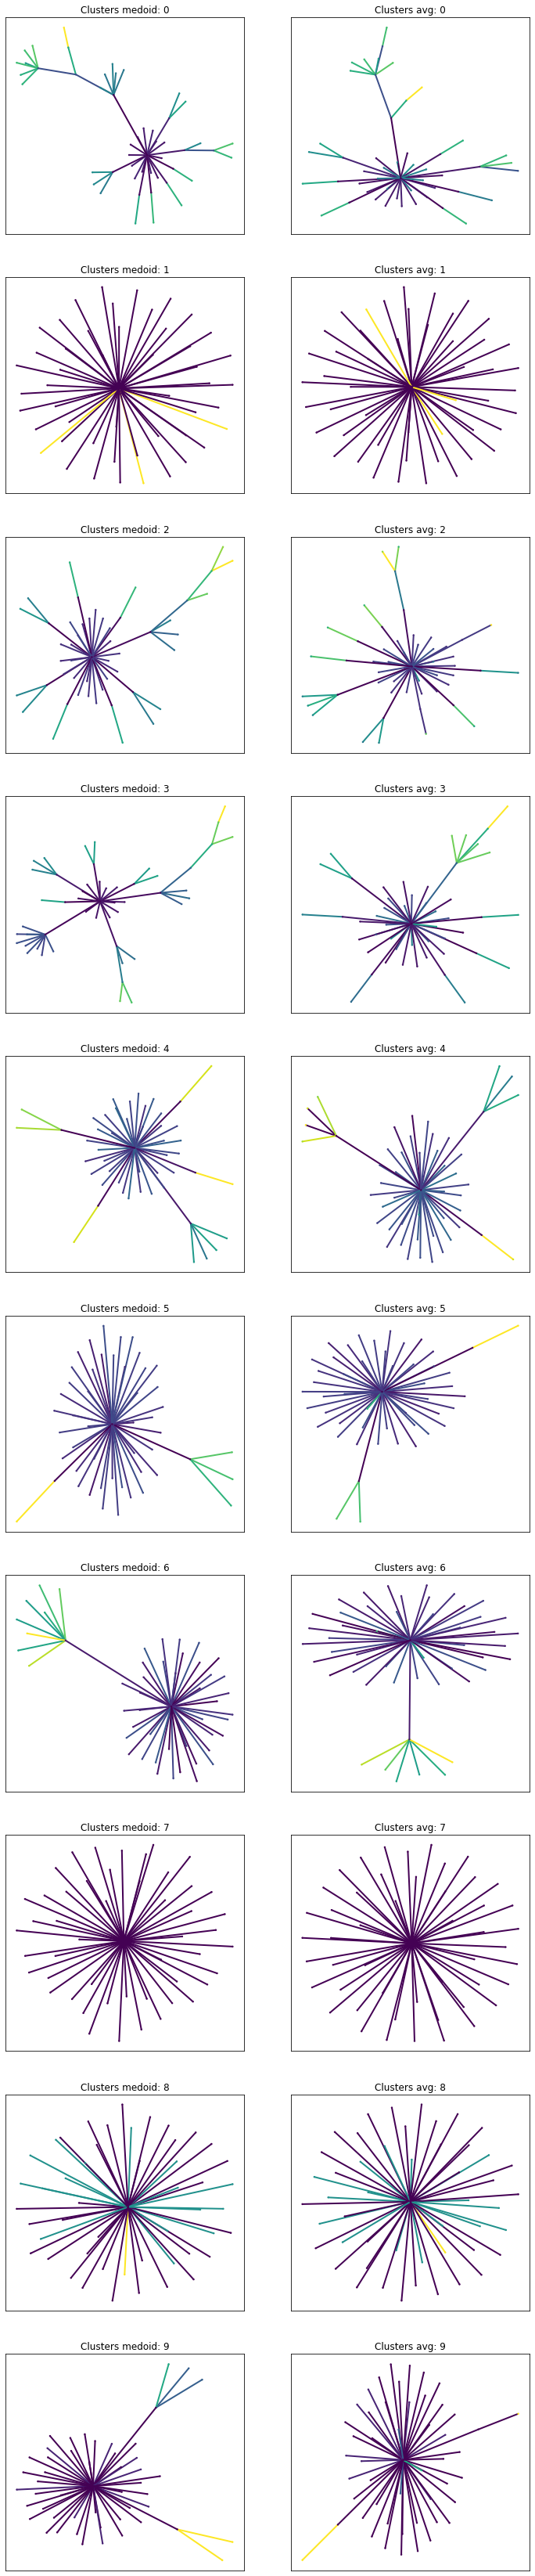

In [9]:
# Get the medoid neuron graph and average neuron graph for a each cluster
cluster_ids_list = [[x] for x in np.sort(np.unique(louvain_clus))]
avg_shape.plot_all_avg_shapes(cluster_ids_list, louvain_clus, data_dir, files_list, match_list, gw_mat, k=3)